Configuration:
--------------------------------------------------
tickers: ['NVDA', 'AMD', 'INTC']
weights: [0.4, 0.4, 0.2]
start_date: 2023-01-01
end_date: 2024-01-01

Loading data for NVDA, AMD, INTC...

Data Summary:

NVDA:
Annual Return: 137.1%
Annual Volatility: 48.5%

AMD:
Annual Return: 95.4%
Annual Volatility: 46.9%

INTC:
Annual Return: 73.6%
Annual Volatility: 38.5%

Data Loading Successful!
--------------------------------------------------

Shape of data:
Close prices: (250, 3)
Returns: (249, 3)


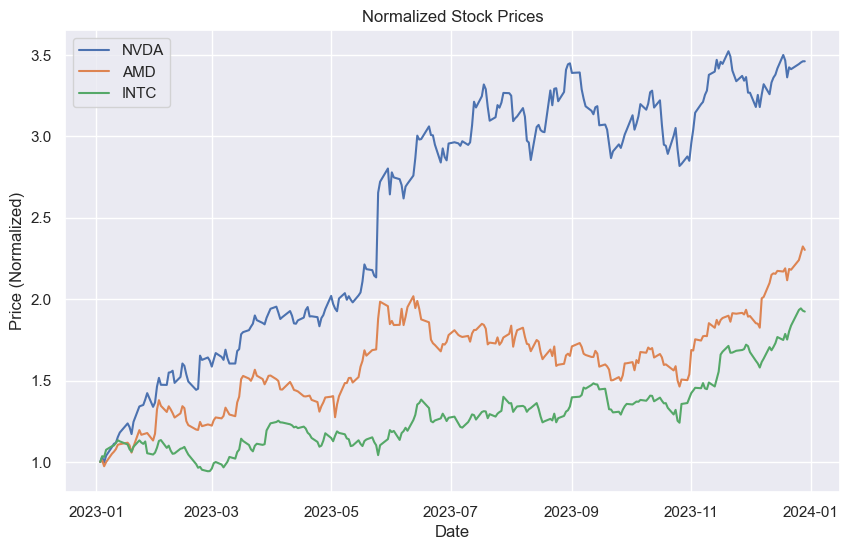


Next steps:
--------------------------------------------------
1. Implement Monte Carlo simulation
2. Add risk metrics
3. Create visualization functions

Performance Analysis:
--------------------------------------------------

Annual Returns:
NVDA: 137.13%
AMD: 95.38%
INTC: 73.65%

Annual Volatility:
NVDA: 48.46%
AMD: 46.94%
INTC: 38.51%

Risk Metrics:
--------------------------------------------------


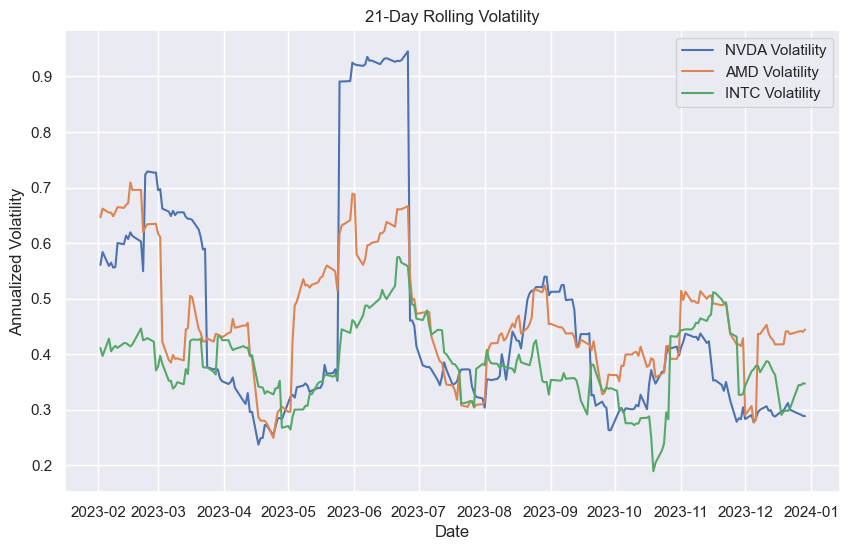


Correlation Matrix:
--------------------------------------------------
Ticker   AMD  INTC  NVDA
Ticker                  
AMD     1.00  0.43  0.67
INTC    0.43  1.00  0.21
NVDA    0.67  0.21  1.00


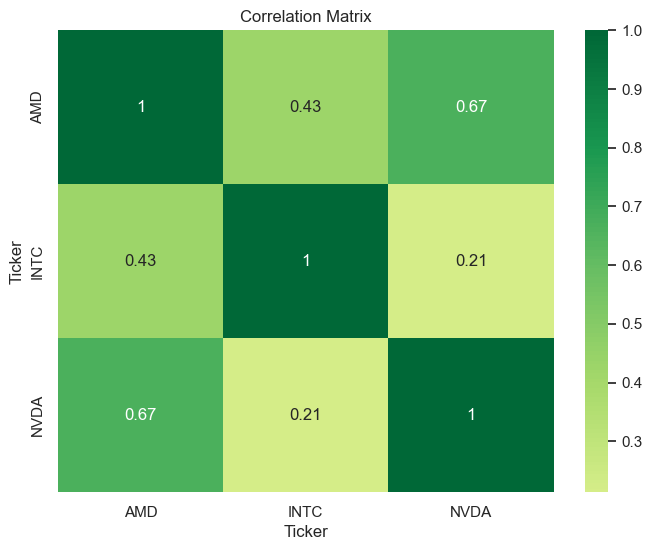


Key Observations:
--------------------------------------------------
1. NVDA showed strongest performance with 137.1% return
2. Highest volatility: NVDA (48.5%)
3. Lowest volatility: INTC (38.5%)
4. Highest correlation: 0.67


/var/folders/1v/b3g8y1js0jn8s0bmf5sypcjh0000gn/T/ipykernel_10566/3959939107.py:129: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"4. Highest correlation: {corr_matrix.unstack().sort_values(ascending=False)[3]:.2f}")


In [3]:
# notebooks/development.ipynb

# 1. Imports and Setup
import sys
from pathlib import Path

# Add project root to path
project_root = str(Path.cwd().parent)
if project_root not in sys.path:
    sys.path.append(project_root)

# Core imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List

# Set basic plotting style
plt.style.use('default')
sns.set_theme()

# 2. Test Data Loading
# First, let's create a simple test to make sure our data loading works
test_config = {
    'tickers': ['NVDA', 'AMD', 'INTC'],
    'weights': [0.4, 0.4, 0.2],
    'start_date': '2023-01-01',
    'end_date': '2024-01-01'
}

print("Configuration:")
print("-" * 50)
for key, value in test_config.items():
    print(f"{key}: {value}")

# 3. Basic Data Test
try:
    from src.data import DataLoader, PortfolioConfig
    
    portfolio_config = PortfolioConfig(**test_config)
    loader = DataLoader(portfolio_config)
    market_data = loader.load_stocks()
    
    print("\nData Loading Successful!")
    print("-" * 50)
    print("\nShape of data:")
    print(f"Close prices: {market_data['close'].shape}")
    print(f"Returns: {market_data['returns'].shape}")
    
except Exception as e:
    print(f"\nError loading data: {str(e)}")

# 4. Basic Plot
if 'market_data' in locals():
    plt.figure(figsize=(10, 6))
    for ticker in test_config['tickers']:
        plt.plot(
            market_data['close'].index,
            market_data['close'][ticker] / market_data['close'][ticker].iloc[0],
            label=ticker
        )
    plt.title('Normalized Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Price (Normalized)')
    plt.legend()
    plt.grid(True)
    plt.show()

# 5. Next Steps
print("\nNext steps:")
print("-" * 50)
print("1. Implement Monte Carlo simulation")
print("2. Add risk metrics")
print("3. Create visualization functions")
# 6. Performance Analysis
print("\nPerformance Analysis:")
print("-" * 50)

# Calculate returns and volatility
returns = market_data['returns']
annual_returns = returns.mean() * 252
annual_vol = returns.std() * np.sqrt(252)

print("\nAnnual Returns:")
for ticker in test_config['tickers']:
    print(f"{ticker}: {annual_returns[ticker]:.2%}")

print("\nAnnual Volatility:")
for ticker in test_config['tickers']:
    print(f"{ticker}: {annual_vol[ticker]:.2%}")

# 7. Risk Metrics
print("\nRisk Metrics:")
print("-" * 50)

# Calculate rolling volatility
rolling_vol = returns.rolling(window=21).std() * np.sqrt(252)

# Plot rolling volatility
plt.figure(figsize=(10, 6))
for ticker in test_config['tickers']:
    plt.plot(rolling_vol.index, rolling_vol[ticker], label=f"{ticker} Volatility")
plt.title('21-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.grid(True)
plt.show()

# 8. Correlation Analysis
print("\nCorrelation Matrix:")
print("-" * 50)
corr_matrix = returns.corr()
print(corr_matrix.round(2))

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0)
plt.title('Correlation Matrix')
plt.show()

# 9. Key Observations
print("\nKey Observations:")
print("-" * 50)
print(f"1. NVDA showed strongest performance with {annual_returns['NVDA']:.1%} return")
print(f"2. Highest volatility: {annual_vol.idxmax()} ({annual_vol.max():.1%})")
print(f"3. Lowest volatility: {annual_vol.idxmin()} ({annual_vol.min():.1%})")
print(f"4. Highest correlation: {corr_matrix.unstack().sort_values(ascending=False)[3]:.2f}")

Loading data for NVDA, AMD, INTC, ^IXIC...

Loading data for NVDA, AMD, INTC, ^IXIC...


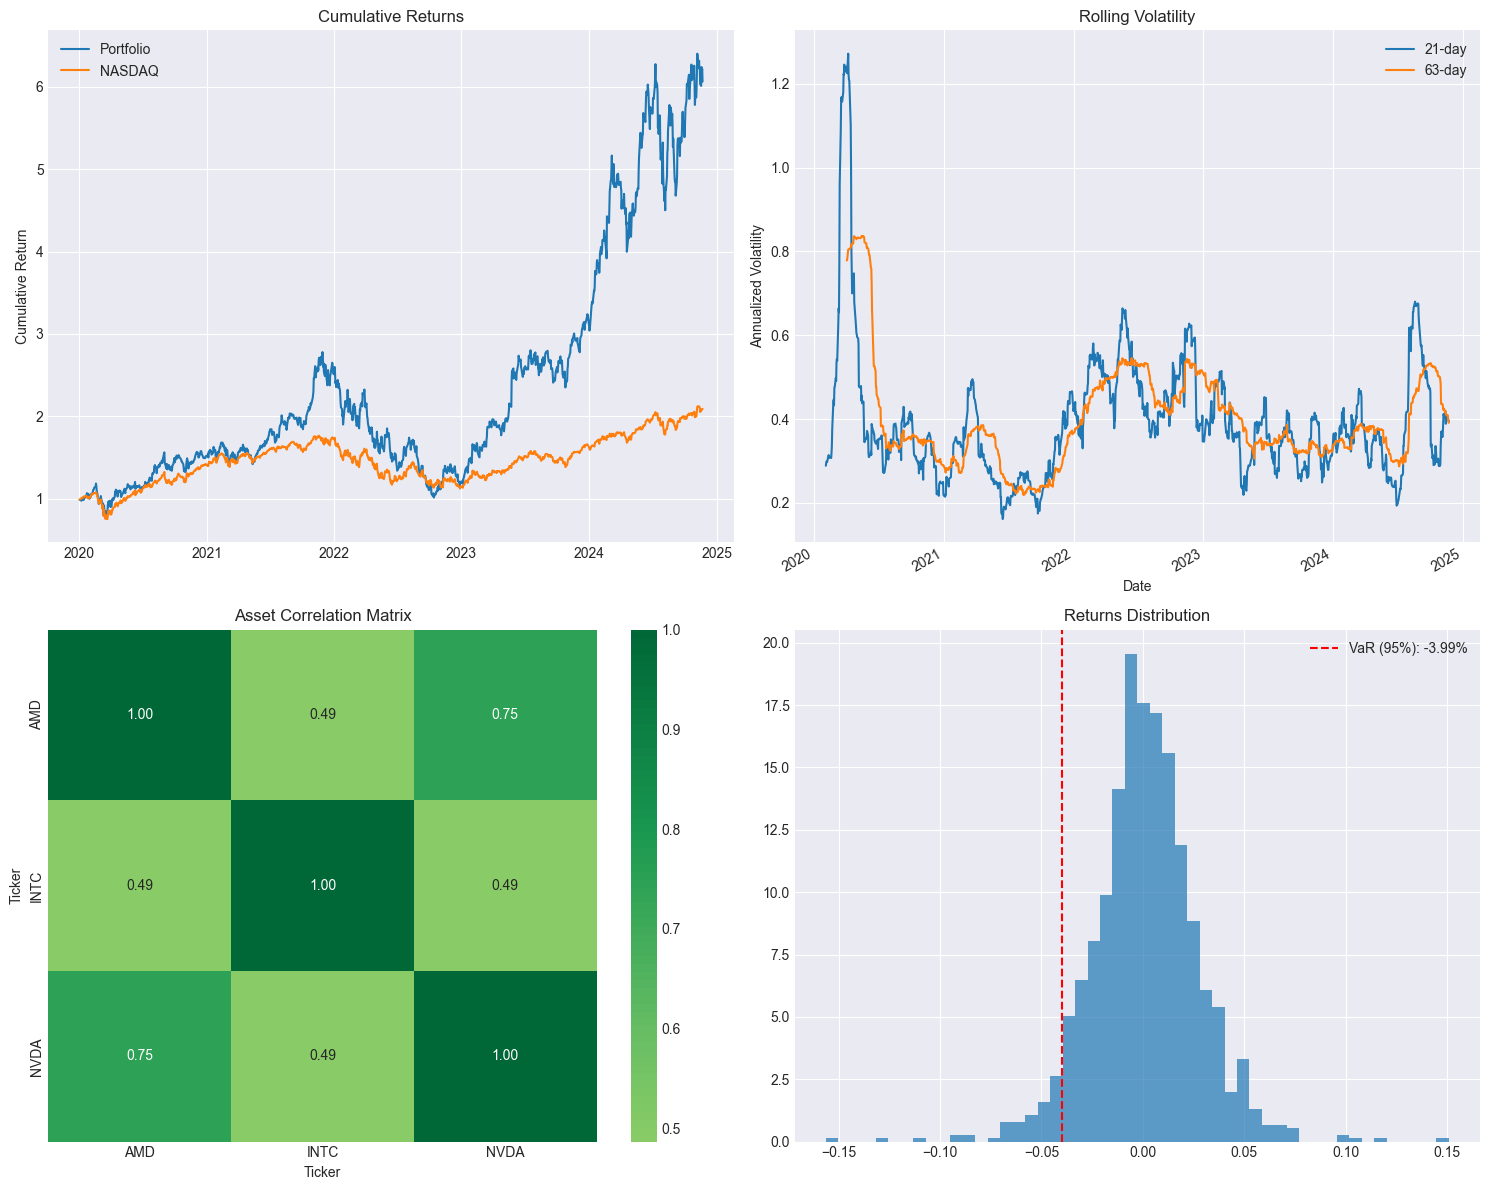


Risk Metrics Summary:
Portfolio Volatility: 42.72%
VaR (95%): -3.99%
Expected Shortfall (95%): -5.74%
Max Drawdown: -59.51%
Sharpe Ratio: 0.73

Risk Regime Analysis:

Low Vol Regime:
Average Monthly Return: 4.36%
Volatility: 26.10%
% of Time: 32.5%

Medium Vol Regime:
Average Monthly Return: 2.81%
Volatility: 37.00%
% of Time: 33.4%

High Vol Regime:
Average Monthly Return: -0.25%
Volatility: 57.06%
% of Time: 32.5%

Performance Statistics:
Total Return: 506.27%
Annualized Return: 44.57%
Risk-Adjusted Return (Sharpe): 0.73


/var/folders/1v/b3g8y1js0jn8s0bmf5sypcjh0000gn/T/ipykernel_20219/3868788872.py:122: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = portfolio_cum_returns[-1] - 1


In [1]:
# Enhanced Risk Analysis Dashboard
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import yfinance as yf

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = [15, 10]

from src.data import DataLoader, PortfolioConfig
from src.risk import RiskManager, RiskConfig
from src.visualization import RiskVisualizer

# 1. Configure and Load Data
portfolio_config = PortfolioConfig(
    tickers=['NVDA', 'AMD', 'INTC', '^IXIC'],
    weights=[0.4, 0.4, 0.2, 0],
    start_date='2020-01-01',
    end_date='2024-11-25'
)

# Load market data
print(f"Loading data for {', '.join(portfolio_config.tickers)}...")
loader = DataLoader(portfolio_config)
market_data = loader.load_stocks()

# 2. Risk Analysis with simplified config
risk_config = RiskConfig(
    confidence_level=0.95,
    max_drawdown_limit=0.20,
    volatility_target=0.15
)

# Initialize RiskManager with weights
risk_manager = RiskManager(
    config=risk_config,
    risk_free_rate=0.05,
    weights=portfolio_config.weights[:-1]  # Exclude benchmark weight
)

# Calculate risk metrics for portfolio returns only (excluding benchmark)
portfolio_returns = market_data['returns'].iloc[:, :-1]  # Exclude benchmark
risk_metrics = risk_manager.calculate_metrics(portfolio_returns)

# 3. Create Visualization Dashboard
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Cumulative Returns
cum_returns = (1 + market_data['returns']).cumprod()
portfolio_cum_returns = cum_returns.iloc[:, :-1].dot(portfolio_config.weights[:-1])
ax1.plot(cum_returns.index, portfolio_cum_returns, label='Portfolio')
ax1.plot(cum_returns.index, cum_returns['^IXIC'], label='NASDAQ')
ax1.set_title('Cumulative Returns')
ax1.set_ylabel('Cumulative Return')
ax1.legend()
ax1.grid(True)

# Plot 2: Rolling Volatility
rolling_vol = risk_metrics['rolling_volatility']
rolling_vol.plot(ax=ax2)
ax2.set_title('Rolling Volatility')
ax2.set_ylabel('Annualized Volatility')
ax2.legend(['21-day', '63-day'])
ax2.grid(True)

# Plot 3: Correlation Matrix
sns.heatmap(risk_metrics['correlation'],
            annot=True,
            cmap='RdYlGn',
            center=0,
            fmt='.2f',
            ax=ax3)
ax3.set_title('Asset Correlation Matrix')

# Plot 4: Returns Distribution
returns = portfolio_returns.dot(portfolio_config.weights[:-1])
ax4.hist(returns, bins=50, density=True, alpha=0.7)
ax4.axvline(risk_metrics['var_95'], color='r', linestyle='--', 
            label=f"VaR (95%): {risk_metrics['var_95']:.2%}")
ax4.set_title('Returns Distribution')
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.show()

# 4. Print Risk Analysis
print("\nRisk Metrics Summary:")
print("=" * 50)
print(f"Portfolio Volatility: {risk_metrics['portfolio_volatility']:.2%}")
print(f"VaR (95%): {risk_metrics['var_95']:.2%}")
print(f"Expected Shortfall (95%): {risk_metrics['expected_shortfall_95']:.2%}")
print(f"Max Drawdown: {risk_metrics['max_drawdown']:.2%}")
print(f"Sharpe Ratio: {risk_metrics['sharpe_ratio']:.2f}")

# 5. Risk Regime Analysis
vol_quantiles = rolling_vol['21d'].quantile([0.33, 0.67])
risk_regimes = pd.cut(rolling_vol['21d'], 
                     bins=[-np.inf, vol_quantiles.iloc[0], 
                           vol_quantiles.iloc[1], np.inf],
                     labels=['Low Vol', 'Medium Vol', 'High Vol'])

print("\nRisk Regime Analysis:")
print("=" * 50)
for regime in ['Low Vol', 'Medium Vol', 'High Vol']:
    regime_returns = returns[risk_regimes == regime]
    print(f"\n{regime} Regime:")
    print(f"Average Monthly Return: {regime_returns.mean() * 21:.2%}")
    print(f"Volatility: {regime_returns.std() * np.sqrt(252):.2%}")
    print(f"% of Time: {(risk_regimes == regime).mean():.1%}")

# 6. Performance Statistics
print("\nPerformance Statistics:")
print("=" * 50)
total_return = portfolio_cum_returns[-1] - 1
annualized_return = (1 + total_return) ** (252/len(returns)) - 1
print(f"Total Return: {total_return:.2%}")
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Risk-Adjusted Return (Sharpe): {risk_metrics['sharpe_ratio']:.2f}")